In [2]:
import matplotlib.pyplot as plt
import json
import os
import cv2
import time
import numpy as np
from csbdeep.utils import Path, normalize
from segmentation import MELC_Segmentation
import pickle
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import umap
from initial_analysis import ExpressionAnalyzer

In [7]:
%load_ext autoreload
%autoreload 2

In [3]:
data = "ALS"
f = open('/data_slow/je30bery/spatial_proteomics/config.json')
config = json.load(f)
data_path = config[data]
seg = MELC_Segmentation(data_path, membrane_marker="cd45") 

In [4]:
EA = ExpressionAnalyzer()

Calculating expression: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 517.03it/s]


Saving at CD11b-PE:0 CD16-PE:1 CD45RA-PE:1 HLA-DR-PE:0 _nuclei.pdf


Calculating expression: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 461.43it/s]


Saving at CD11b-PE:0 CD16-PE:1 CD45RA-PE:1 HLA-DR-PE:0 _cell.pdf


Calculating expression: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 523.88it/s]


Saving at CD11b-PE:0 CD16-PE:1 HLA-DQ-FITC:0 _nuclei.pdf


Calculating expression: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 457.35it/s]


Saving at CD11b-PE:0 CD16-PE:1 HLA-DQ-FITC:0 _cell.pdf


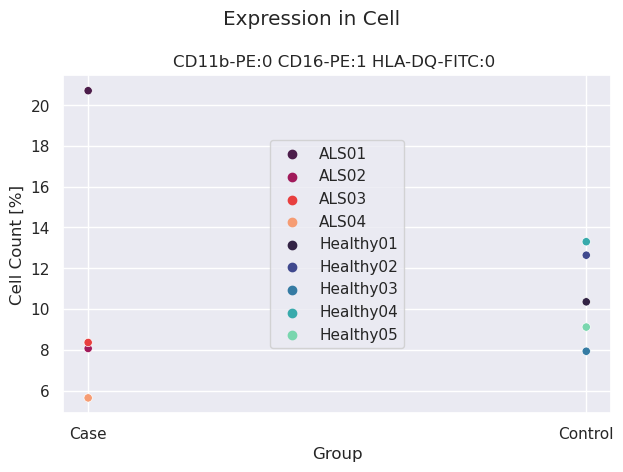

In [26]:
EA.run(segment="nuclei", profile={'CD11b-PE': 0, 'CD16-PE': 1, 'CD45RA-PE': 1, 'HLA-DR-PE': 0})
EA.run(segment="cell", profile={'CD11b-PE': 0, 'CD16-PE': 1, 'CD45RA-PE': 1, 'HLA-DR-PE': 0})
EA.run(segment="nuclei", profile={'CD11b-PE': 0, 'CD16-PE': 1, 'HLA-DQ-FITC': 0})
EA.run(segment="cell", profile={'CD11b-PE': 0, 'CD16-PE': 1, 'HLA-DQ-FITC': 0})